In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
from os import listdir
path = "D:\\Research\\data\\KDEF"
pathlist = listdir(path)

In [ ]:
from shutil import copyfile
import os

for i in range(len(pathlist)):
    img_path = listdir(path+"\\"+pathlist[i])
    for j in range(len(img_path)):
        if(img_path[j][4:6]=="AF"):
            dst = "data\\AF"
        elif(img_path[j][4:6]=="AN"):
            dst = "data\\AN"
        elif(img_path[j][4:6]=="DI"):
            dst = "data\\DI"
        elif(img_path[j][4:6]=="HA"):
            dst = "data\\HA"
        elif(img_path[j][4:6]=="NE"):
            dst = "data\\NE"
        elif(img_path[j][4:6]=="SA"):
            dst = "data\\SA"
        elif(img_path[j][4:6]=="SU"):
            dst = "data\\SU"
        
        if not os.path.exists(dst):
            os.makedirs(dst)
        
        src = path+"\\"+pathlist[i]+"\\"+img_path[j]
        dst = dst + "\\" + img_path[j]
        try:
            copyfile(src, dst)
        except:
            pass

In [19]:
root = 'data'
for path in ["AF", "AN", "DI", "HA", "NE", "SA", "SU"]:
    os.makedirs('data\\train\\'+path, exist_ok=True)
    os.makedirs('data\\test\\'+path, exist_ok=True)
    file = listdir(os.path.join(root, path))
    
    for image in file:
        subdir = np.random.choice(['train', 'test'], p=[0.95, 0.05])
        src = 'data\\'+path+'\\'+image
        dst = 'data\\'+subdir+'\\'+path+'\\'+image
        try:
            copyfile(src, dst)
        except:
            pass

# Training with CNN

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'D:\\Research\\data\\KDEF\\train'
test_dir ='D:\\Research\\data\\KDEF\\test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    batch_size=8
)

Found 4650 images belonging to 7 classes.
Found 247 images belonging to 7 classes.


In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
__________

In [5]:
model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 146,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Epoch 1/50
146/146 [==============================] - 43s 296ms/step - loss: 1.9413 - acc: 0.1664 - val_loss: 1.9278 - val_acc: 0.1538
Epoch 2/50
146/146 [==============================] - 29s 200ms/step - loss: 1.9059 - acc: 0.2167 - val_loss: 1.8768 - val_acc: 0.2267
Epoch 3/50
146/146 [==============================] - 31s 209ms/step - loss: 1.8521 - acc: 0.2469 - val_loss: 1.8151 - val_acc: 0.2591
Epoch 4/50
146/146 [==============================] - 30s 203ms/step - loss: 1.7802 - acc: 0.3032 - val_loss: 1.7253 - val_acc: 0.2996
Epoch 5/50
146/146 [==============================] - 30s 205ms/step - loss: 1.6552 - acc: 0.3708 - val_loss: 1.5739 - val_acc: 0.4089
Epoch 6/50
146/146 [==============================] - 31s 216ms/step - loss: 1.4792 - acc: 0.4553 - val_loss: 1.4047 - val_acc: 0.4737
Epoch 7/50
146/146 [==============================] - 31s 215ms/step - loss: 1.3219 - acc: 0.5198 - val_loss: 1.3172 - val_acc: 0.4656
Epoch 8/50
146/146 [==============================] - 3

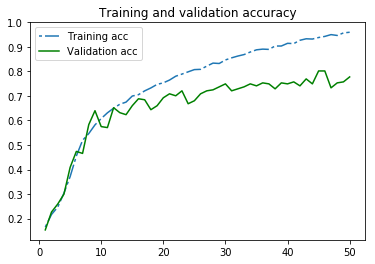

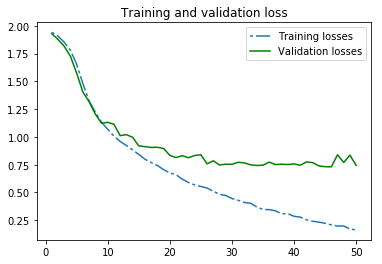

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2], label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Try using pretrined model

In [9]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))

conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [44]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               12845568  
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 3591      
Total params: 27,563,847
Trainable params: 27,563,847
Non-trainable params: 0
_________________________________________________________________


In [45]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=31)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15
146/146 [==============================] - 35s 237ms/step - loss: 1.6675 - categorical_accuracy: 0.3610 - val_loss: 1.4949 - val_categorical_accuracy: 0.4453
Epoch 2/15
146/146 [==============================] - 34s 232ms/step - loss: 1.1082 - categorical_accuracy: 0.5992 - val_loss: 1.0812 - val_categorical_accuracy: 0.5951
Epoch 3/15
146/146 [==============================] - 33s 224ms/step - loss: 0.8557 - categorical_accuracy: 0.7253 - val_loss: 1.1325 - val_categorical_accuracy: 0.5709
Epoch 4/15
146/146 [==============================] - 34s 230ms/step - loss: 0.7199 - categorical_accuracy: 0.7663 - val_loss: 0.9719 - val_categorical_accuracy: 0.5951
Epoch 5/15
146/146 [==============================] - 33s 224ms/step - loss: 0.6004 - categorical_accuracy: 0.8211 - val_loss: 0.9220 - val_categorical_accuracy: 0.6437
Epoch 6/15
146/146 [==============================] - 33s 225ms/step - loss: 0.499

In [46]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [48]:
model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=50, 
                              validation_data=validation_generator, 
                              validation_steps=31)

Epoch 1/50
146/146 [==============================] - 39s 270ms/step - loss: 0.1329 - categorical_accuracy: 0.9542 - val_loss: 0.4636 - val_categorical_accuracy: 0.8462
Epoch 2/50
146/146 [==============================] - 37s 255ms/step - loss: 0.1011 - categorical_accuracy: 0.9666 - val_loss: 0.4442 - val_categorical_accuracy: 0.8340
Epoch 3/50
146/146 [==============================] - 37s 254ms/step - loss: 0.0740 - categorical_accuracy: 0.9769 - val_loss: 0.4579 - val_categorical_accuracy: 0.8462
Epoch 4/50
146/146 [==============================] - 37s 254ms/step - loss: 0.0594 - categorical_accuracy: 0.9820 - val_loss: 0.5259 - val_categorical_accuracy: 0.8259
Epoch 5/50
146/146 [==============================] - 37s 254ms/step - loss: 0.0516 - categorical_accuracy: 0.9848 - val_loss: 0.6070 - val_categorical_accuracy: 0.8097
Epoch 6/50
146/146 [==============================] - 37s 254ms/step - loss: 0.0467 - categorical_accuracy: 0.9844 - val_loss: 0.3942 - val_categorical_acc

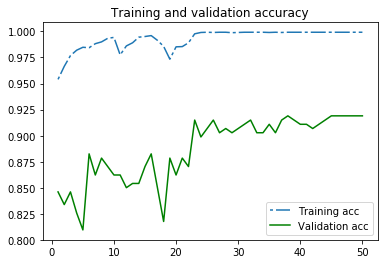

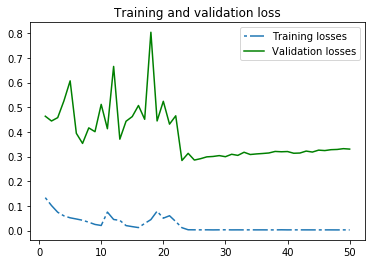

In [49]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model.save('fully_trained_model.h5')

# Train the full VGG network

Epoch 1/30
146/146 [==============================] - 39s 265ms/step - loss: 0.0245 - categorical_accuracy: 0.9934 - val_loss: 0.3486 - val_categorical_accuracy: 0.8866
Epoch 2/30
146/146 [==============================] - 37s 253ms/step - loss: 0.0505 - categorical_accuracy: 0.9850 - val_loss: 0.5869 - val_categorical_accuracy: 0.8381
Epoch 3/30
146/146 [==============================] - 37s 253ms/step - loss: 0.0361 - categorical_accuracy: 0.9895 - val_loss: 0.4146 - val_categorical_accuracy: 0.8745
Epoch 4/30
146/146 [==============================] - 37s 254ms/step - loss: 0.0301 - categorical_accuracy: 0.9906 - val_loss: 0.4230 - val_categorical_accuracy: 0.8785
Epoch 5/30
146/146 [==============================] - 37s 254ms/step - loss: 0.0368 - categorical_accuracy: 0.9893 - val_loss: 0.4177 - val_categorical_accuracy: 0.8907
Epoch 6/30
146/146 [==============================] - 37s 253ms/step - loss: 0.0216 - categorical_accuracy: 0.9944 - val_loss: 0.3454 - val_categorical_acc

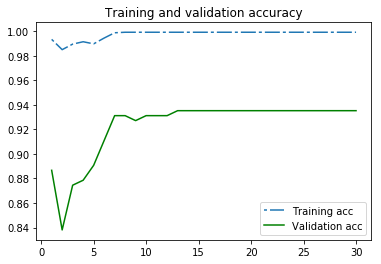

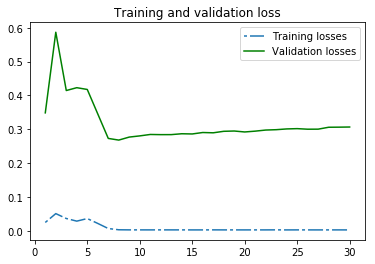

In [51]:
conv_base.trainable = True

model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=31)

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Train longer with dropout

In [4]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(224, 224, 3))


model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=31)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3591      
Total params: 27,563,847
Trainable params: 27,563,847
Non-trainable params: 0
_________________________________________________________________
This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15
146/146 [==============================] - 38s

In [5]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=50, 
                              validation_data=validation_generator, 
                              validation_steps=31)



Epoch 1/50
146/146 [==============================] - 39s 265ms/step - loss: 0.1389 - categorical_accuracy: 0.9687 - val_loss: 0.5704 - val_categorical_accuracy: 0.7692
Epoch 2/50
146/146 [==============================] - 37s 252ms/step - loss: 0.0839 - categorical_accuracy: 0.9878 - val_loss: 0.5431 - val_categorical_accuracy: 0.7976
Epoch 3/50
146/146 [==============================] - 37s 252ms/step - loss: 0.0659 - categorical_accuracy: 0.9902 - val_loss: 0.5342 - val_categorical_accuracy: 0.8178
Epoch 4/50
146/146 [==============================] - 37s 252ms/step - loss: 0.0507 - categorical_accuracy: 0.9917 - val_loss: 0.4691 - val_categorical_accuracy: 0.8381
Epoch 5/50
146/146 [==============================] - 37s 251ms/step - loss: 0.0342 - categorical_accuracy: 0.9942 - val_loss: 0.4667 - val_categorical_accuracy: 0.8502
Epoch 6/50
146/146 [==============================] - 37s 252ms/step - loss: 0.0351 - categorical_accuracy: 0.9955 - val_loss: 0.4887 - val_categorical_acc

NameError: name 'plt' is not defined

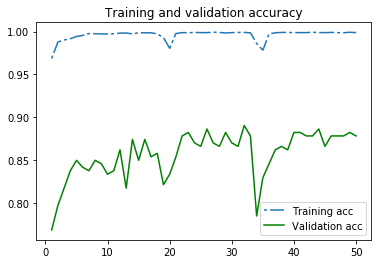

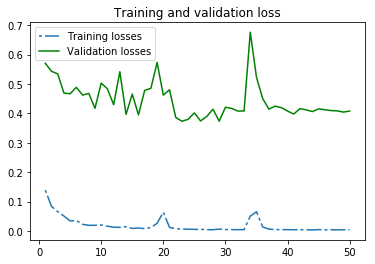

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()   

## Full model train with dropout in last layer

Epoch 1/50
146/146 [==============================] - 38s 260ms/step - loss: 0.0109 - categorical_accuracy: 0.9976 - val_loss: 0.4890 - val_categorical_accuracy: 0.8381
Epoch 2/50
146/146 [==============================] - 36s 247ms/step - loss: 0.0171 - categorical_accuracy: 0.9940 - val_loss: 0.3957 - val_categorical_accuracy: 0.8704
Epoch 3/50
146/146 [==============================] - 36s 248ms/step - loss: 0.0115 - categorical_accuracy: 0.9972 - val_loss: 0.3863 - val_categorical_accuracy: 0.8785
Epoch 4/50
146/146 [==============================] - 36s 248ms/step - loss: 0.0053 - categorical_accuracy: 0.9983 - val_loss: 0.4107 - val_categorical_accuracy: 0.8745
Epoch 5/50
146/146 [==============================] - 36s 248ms/step - loss: 0.0148 - categorical_accuracy: 0.9957 - val_loss: 0.3656 - val_categorical_accuracy: 0.8866
Epoch 6/50
146/146 [==============================] - 36s 248ms/step - loss: 0.0238 - categorical_accuracy: 0.9925 - val_loss: 0.3772 - val_categorical_acc

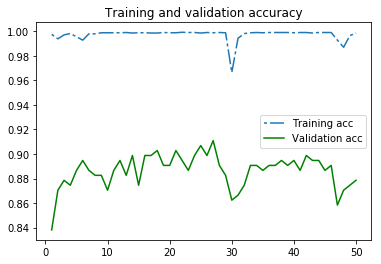

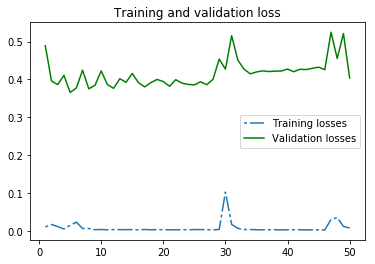

In [8]:
conv_base.trainable = True


model.compile(
    optimizer=optimizers.Adam(lr=1e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=146, 
                              epochs=50, 
                              validation_data=validation_generator, 
                              validation_steps=31)

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,  dashes=[2, 2, 10, 2], label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss,  dashes=[2, 2, 10, 2],label='Training losses')
plt.plot(epochs, val_loss, 'g', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()  

# Test the model

In [ ]:
from keras.models import load_model
model = load_model('fully_trained_model.h5')

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [59]:
labels = {
    0 : "Afraid",
    1 : "Angry",
    2 : "disgust",
    3 : "happy",
    4 : "neutral",
    5 : "sad",
    6 : "surprised"
}

In [54]:
image = cv2.imread('E:\\2.jpg')
image.shape

(370, 240, 3)

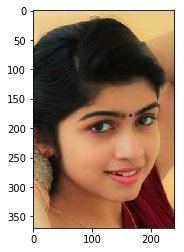

In [55]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [57]:
image=np.array(cv2.resize(image, (150,150)))
image = image.reshape(1, 150, 150, 3)
image.shape

(1, 150, 150, 3)

In [61]:
labels[np.argmax(model.predict(image))]

'happy'

In [3]:
from keras.models import load_model
from os import listdir
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

labels = {
    0 : "AF",
    1 : "AN",
    2 : "DI",
    3 : "HA",
    4 : "NE",
    5 : "SA",
    6 : "SU"
}
model = load_model('fully_trained_model.h5')
result = [[0 for _ in range(7)] for _ in range(7)]

from keras.preprocessing.image import ImageDataGenerator
test_dir ='D:\\Research\\data\\KDEF\\test'


test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size=247  # put batch size == total data
)


data, labels = test_generator.next()
labels = np.argmax(labels, axis=1)

predictions = model.predict(data)
predictions = np.argmax(predictions, axis=1)

for i in range(len(predictions)):
    result[labels[i]][predictions[i]] += 1
    
result

Found 247 images belonging to 7 classes.
[[30, 0, 2, 0, 1, 2, 4], [1, 39, 1, 0, 0, 0, 0], [0, 2, 37, 0, 0, 1, 0], [0, 0, 0, 36, 0, 0, 0], [0, 0, 0, 0, 21, 1, 0], [0, 2, 0, 0, 1, 28, 0], [2, 0, 0, 0, 0, 0, 36]]


In [4]:
result

[[30, 0, 2, 0, 1, 2, 4],
 [1, 39, 1, 0, 0, 0, 0],
 [0, 2, 37, 0, 0, 1, 0],
 [0, 0, 0, 36, 0, 0, 0],
 [0, 0, 0, 0, 21, 1, 0],
 [0, 2, 0, 0, 1, 28, 0],
 [2, 0, 0, 0, 0, 0, 36]]